In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def read_video(path: str) -> list:
    cap = cv2.VideoCapture(path)
    video = []
    while cap.isOpened():
        ret, frame = cap.read()
        if cv2.waitKey(1) & 0xFF == ord('q') or not ret:
            break
        video.append(frame)
    return video

In [3]:
video = read_video('Flamingo - 49459.mp4')

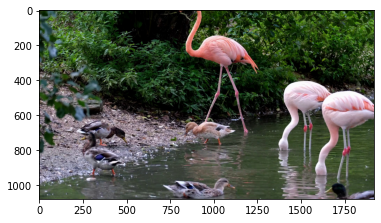

In [5]:
plt.imshow(cv2.cvtColor(video[200], cv2.COLOR_BGR2RGB))
plt.show()

In [6]:
print(len(video[0]))
print(len(video[0][0]))

1080
1920


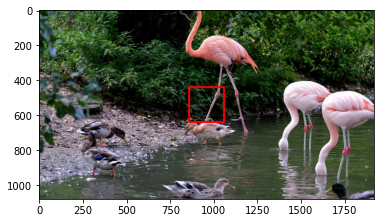

In [7]:
new_img = np.copy(video[200])
cv2.rectangle(new_img, (860, 440),(1060, 640),(0,0,255),10)
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
def draw_rectangle(frame: np.array, point_one: tuple, point_two: tuple) -> np.array:
    new_frame = np.copy(frame)
    cv2.rectangle(new_frame, point_one, point_two, (255,0,0), thickness=10)
    return new_frame

In [16]:
def draw_rect_onN_frame(frames: list) -> list:
    ans = []
    x = len(frames[0][0])
    y = len(frames[0])
    point_one = (int(x / 2 - 100), int(y / 2 - 100))
    point_two = (int(x / 2 + 100), int(y / 2 + 100))
    for frame in frames:
        new_frame = draw_rectangle(frame, point_one, point_two)
        ans.append(new_frame)
    return ans

In [17]:
def save_frames(frames: list, path: str):
    i = 0
    for frame in frames:
        bgr = cv2.cvtColor(frame, cv2.COLOR_RGB2BGR)
        cv2.imwrite(path + '/' + str(i) + '.jpg', bgr)
        i += 1

In [20]:
result = draw_rect_onN_frame(video[:150])
save_frames(result, 'new_frames')

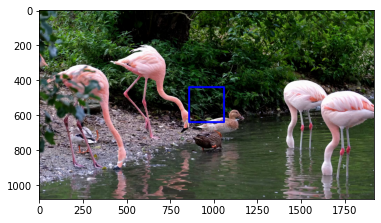

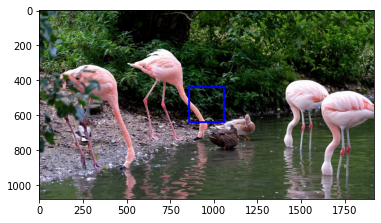

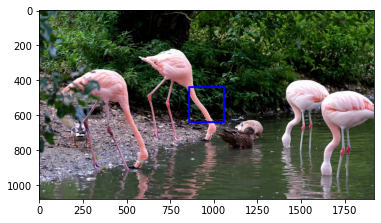

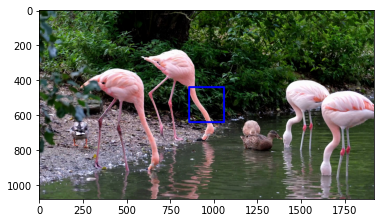

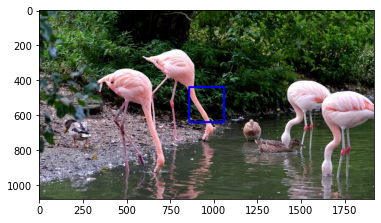

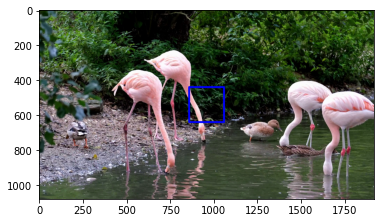

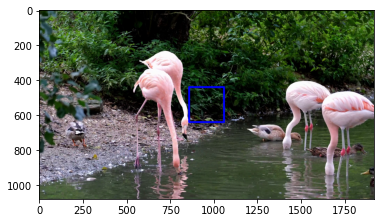

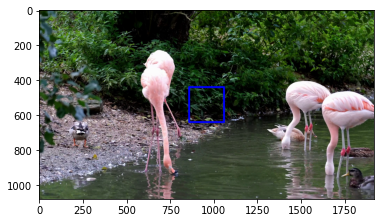

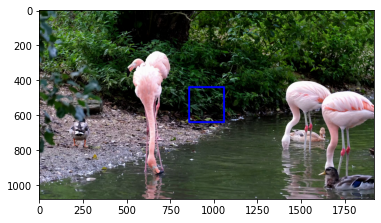

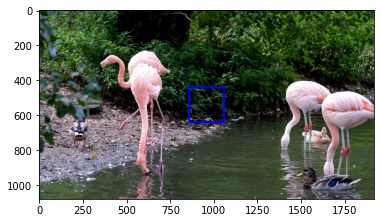

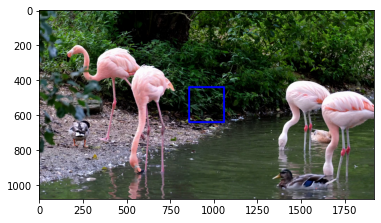

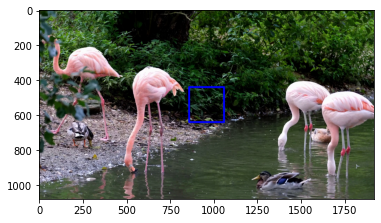

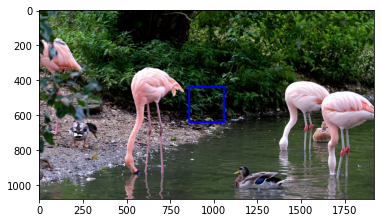

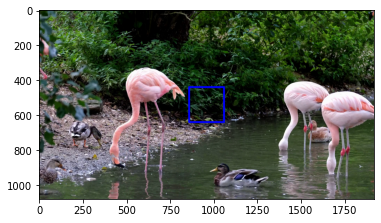

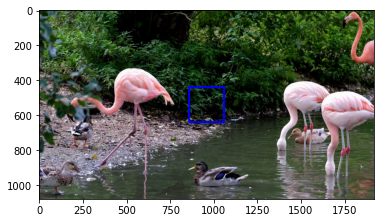

In [25]:
i = 0
for res in result:
    if (i % 10 == 0):
        plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
        plt.show()
    i += 1